<a href="https://colab.research.google.com/github/RajArPatra/MIDAS-task-2/blob/main/Results_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import torchvision
import os
import numpy as np
from skimage import io,transform as ts
import torch
from torchvision import transforms
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import imgaug as ia
import imgaug.augmenters as iaa
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from torch.autograd import Variable
import distutils
from distutils import dir_util
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter


Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PART 1

Training and evaluation for part1 for whole of 62 classes

In [ ]:
run_train(model,criterion,optimizer,scheduler,'/content/drive/MyDrive/Model_files','task2/BMCNN_part1',0,70,10,False)

 Epoch: 0 Iter: 0 Average train loss: 4.2706
 Epoch: 0 Iter: 100 Average train loss: 4.5716


====> After epoch 0 
====>Epoch Time: 0m 34s
====>Average train loss: 4.5318 


 Epoch: 1 Iter: 0 Average train loss: 4.4155
 Epoch: 1 Iter: 100 Average train loss: 4.3727


====> After epoch 1 
====>Epoch Time: 0m 34s
====>Average train loss: 4.3441 


 Epoch: 2 Iter: 0 Average train loss: 4.5803
 Epoch: 2 Iter: 100 Average train loss: 4.2247


====> After epoch 2 
====>Epoch Time: 0m 33s
====>Average train loss: 4.1836 


 Epoch: 3 Iter: 0 Average train loss: 4.2621
 Epoch: 3 Iter: 100 Average train loss: 4.0549


====> After epoch 3 
====>Epoch Time: 0m 34s
====>Average train loss: 4.0082 


 Epoch: 4 Iter: 0 Average train loss: 3.9282
 Epoch: 4 Iter: 100 Average train loss: 3.8463


====> After epoch 4 
====>Epoch Time: 0m 34s
====>Average train loss: 3.8120 


 Epoch: 5 Iter: 0 Average train loss: 4.0263
 Epoch: 5 Iter: 100 Average train loss: 3.6955


====> After epoch 5 
====>Epoch Time

In [ ]:
print('====> After epoch {} '.format(con.epoch))
print('====>conv Time: {}'.format(con.time))
#print('====>conv Time: {}'.format(con.time))
print('====>Average train loss: {:.4f} +-{:.4f}'.format(
                 con.meter.value()[0],con.meter.value()[1]))

====> After epoch 55 
====>conv Time: 1907.9600670337677
====>Average train loss: 1.2845 +-0.0171


In [ ]:

print('Train_accuracy:'.format(acc_meter.value())

Train_accuracy: 0.8620967741935484


Confusion matrix, without normalization
[[35  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  4  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 39]]


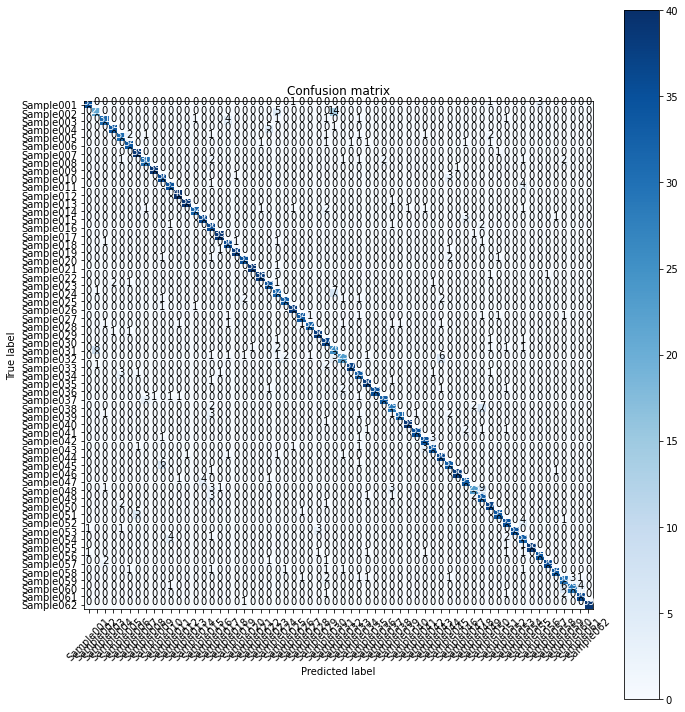

In [ ]:
train_labels,train_preds = get_all_preds(model, train_loader)
cm = confusion_matrix(train_labels, train_preds.argmax(dim=1))
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, lst1)

Training and evaluation for part1 for (0-9) classes

In [ ]:
run(model,criterion,optimizer,scheduler,'/content/drive/MyDrive/Model_files','task2/BMCNN_(0-9)_part1',0,100,10,False)

 Epoch: 0 Iter: 0 Average train loss: 3.0626


====> After epoch 0 
====>Epoch Time: 0m 5s
====>Average train loss: 2.6124 


 Epoch: 1 Iter: 0 Average train loss: 2.2847


====> After epoch 1 
====>Epoch Time: 0m 5s
====>Average train loss: 2.5068 


 Epoch: 2 Iter: 0 Average train loss: 2.2013


====> After epoch 2 
====>Epoch Time: 0m 5s
====>Average train loss: 2.5091 


 Epoch: 3 Iter: 0 Average train loss: 2.5242


====> After epoch 3 
====>Epoch Time: 0m 5s
====>Average train loss: 2.4903 


 Epoch: 4 Iter: 0 Average train loss: 2.3181


====> After epoch 4 
====>Epoch Time: 0m 5s
====>Average train loss: 2.3724 


 Epoch: 5 Iter: 0 Average train loss: 1.9034


====> After epoch 5 
====>Epoch Time: 0m 5s
====>Average train loss: 2.3534 


 Epoch: 6 Iter: 0 Average train loss: 2.6350


====> After epoch 6 
====>Epoch Time: 0m 5s
====>Average train loss: 2.3031 


 Epoch: 7 Iter: 0 Average train loss: 2.5244


====> After epoch 7 
====>Epoch Time: 0m 5s
====>Average train loss: 2.

In [ ]:
print('====> After epoch {} '.format(con.epoch))
print('====>conv Time: {}'.format(con.time))
#print('====>conv Time: {}'.format(con.time))
print('====>Average train loss: {:.4f} +-{:.4f}'.format(
                 con.meter.value()[0],con.meter.value()[1]))

====> After epoch 40 
====>conv Time: 223.8778576850891
====>Average train loss: 1.0198 +-0.0440


In [ ]:
acc_meter=AverageValueMeter()
model.eval()
for batch_idx, (data,label) in enumerate(train_loader):
    data = data.to(device)
    label=label.to(device)
    data = data.expand(-1, 3, -1, -1)
    output= model(data)
    
   
    r=accuracy_fn(output.data,label.data,(1,3,5))
    acc_meter.add(r[0].item())
print('Train_accuracy:{}'.format(acc_meter.value()))

Train_accuracy:0.84


Confusion matrix, without normalization
[[26  2  1  2  2  0  7  0  0  0]
 [ 0 36  1  1  1  0  0  1  0  0]
 [ 0  0 37  0  1  0  1  1  0  0]
 [ 0  2  0 30  1  0  3  0  1  3]
 [ 0  0  0  0 35  0  2  0  0  3]
 [ 0  0  0  2  1 34  2  0  0  1]
 [ 0  0  0  0  1  0 38  0  1  0]
 [ 0  0  0  0  3  0  0 33  0  4]
 [ 0  0  0  0  1  0  2  0 37  0]
 [ 0  2  0  0  2  0  0  0  1 35]]


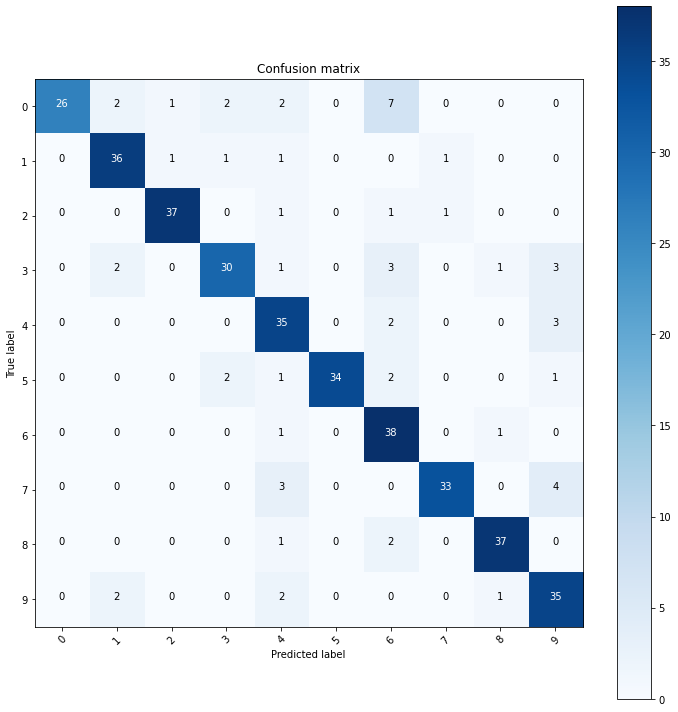

In [ ]:
cm=conf(model,train_loader,10)
cm=cm.cpu().numpy().astype('uint64')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, lst1)

# Part 2 

Training and Evaluation Metrics for part2 without pretrained weights

In [ ]:
run(model,criterion,optimizer,scheduler,'/content/drive/MyDrive/Model_files','task2/BMCNN_part2_nopre3',0,100,10,False,1)

 Epoch: 0 Iter: 0 Average train loss: 2.4773
 Epoch: 0 Iter: 1000 Average train loss: 1.2459
 Epoch: 0 Iter: 2000 Average train loss: 0.9317
 Epoch: 0 Iter: 3000 Average train loss: 0.7897
 Epoch: 0 Iter: 0 Average val loss: 0.4479 Acc1: 0.81 Acc3: 1.00 Acc5: 1.00


====> After epoch 0 
====>Epoch Time: 0m 45s
====>Average train loss: 0.7204 
====> Average val loss: 0.2254 Acc1: 0.94 Acc3: 0.99 Acc5: 1.00


 Epoch: 1 Iter: 0 Average train loss: 0.7511
 Epoch: 1 Iter: 1000 Average train loss: 0.3844
 Epoch: 1 Iter: 2000 Average train loss: 0.3714
 Epoch: 1 Iter: 3000 Average train loss: 0.3578
 Epoch: 1 Iter: 0 Average val loss: 0.0402 Acc1: 1.00 Acc3: 1.00 Acc5: 1.00


====> After epoch 1 
====>Epoch Time: 0m 44s
====>Average train loss: 0.3513 
====> Average val loss: 0.0796 Acc1: 0.98 Acc3: 1.00 Acc5: 1.00


 Epoch: 2 Iter: 0 Average train loss: 0.4488
 Epoch: 2 Iter: 1000 Average train loss: 0.2881
 Epoch: 2 Iter: 2000 Average train loss: 0.2852
 Epoch: 2 Iter: 3000 Average train lo

In [ ]:
print('====> After epoch {} '.format(con.epoch))
print('====>conv Time: {}'.format(con.time))
#print('====>conv Time: {}'.format(con.time))
print('====>Average train loss: {:.4f} +-{:.4f}'.format(
                 con.meter.value()[0],con.meter.value()[1]))

====> After epoch 13 
====>conv Time: 630.5595891475677
====>Average train loss: 0.0170 +-0.0012


In [ ]:
acc_meter=AverageValueMeter()
model.eval()
for batch_idx, (data,label) in enumerate(test_loader):
    data = data.to(device)
    label=label.to(device)
    data = data.expand(-1, 3, -1, -1)
    output= model(data)
    
   
    r=accuracy_fn(output.data,label.data,(1,3,5))
    acc_meter.add(r[0].item())
print('Test_accuracy:{}'.format(acc_meter.value()))

Test_accuracy:0.9957000000000005


Confusion matrix, without normalization
[[5920    0    0    1    0    0    2    0    0    0]
 [   0 6731    0    0    0    1    3    6    1    0]
 [   0   10 5938    1    0    0    2    6    1    0]
 [   1    0    0 6117    0    7    1    2    2    1]
 [   0    2    0    0 5830    0    1    3    0    6]
 [   0    0    0    2    0 5413    4    0    1    1]
 [   2    0    0    0    2    1 5913    0    0    0]
 [   0    5    1    0    1    0    0 6256    0    2]
 [   1    1    0    0    1    4    2    1 5837    4]
 [   0    0    0    1   16    3    0    2    0 5927]]


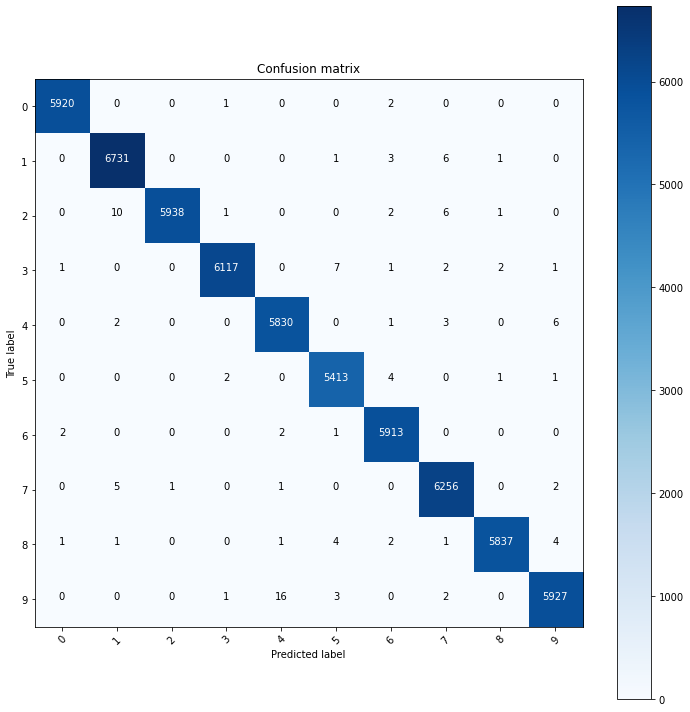

In [ ]:
cm=conf(model,train_loader,10)
cm=cm.cpu().numpy().astype('uint64')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, lst1)

Training and Evaluation Metrics for part2 with pretrained weights from part 1

In [ ]:
run_pre(model,criterion,optimizer,scheduler,'/content/drive/MyDrive/Model_files','task2/BMCNN_part2_pre3',0,100,10,False,1)

 Epoch: 0 Iter: 0 Average train loss: 2.4606
 Epoch: 0 Iter: 1000 Average train loss: 0.9732
 Epoch: 0 Iter: 2000 Average train loss: 0.7794
 Epoch: 0 Iter: 3000 Average train loss: 0.6809
 Epoch: 0 Iter: 0 Average val loss: 0.1013 Acc1: 1.00 Acc3: 1.00 Acc5: 1.00


====> After epoch 0 
====>Epoch Time: 0m 46s
====>Average train loss: 0.6301 
====> Average val loss: 0.1604 Acc1: 0.97 Acc3: 1.00 Acc5: 1.00


 Epoch: 1 Iter: 0 Average train loss: 0.4502
 Epoch: 1 Iter: 1000 Average train loss: 0.3853
 Epoch: 1 Iter: 2000 Average train loss: 0.3702
 Epoch: 1 Iter: 3000 Average train loss: 0.3568
 Epoch: 1 Iter: 0 Average val loss: 0.0950 Acc1: 1.00 Acc3: 1.00 Acc5: 1.00


====> After epoch 1 
====>Epoch Time: 0m 44s
====>Average train loss: 0.3451 
====> Average val loss: 0.0900 Acc1: 0.98 Acc3: 1.00 Acc5: 1.00


 Epoch: 2 Iter: 0 Average train loss: 0.2567
 Epoch: 2 Iter: 1000 Average train loss: 0.2933
 Epoch: 2 Iter: 2000 Average train loss: 0.2823
 Epoch: 2 Iter: 3000 Average train lo

In [ ]:
print('====> After epoch {} '.format(con.epoch))
print('====>conv Time: {}'.format(con.time))
#print('====>conv Time: {}'.format(con.time))
print('====>Average train loss: {:.4f} +-{:.4f}'.format(
                 con.meter.value()[0],con.meter.value()[1]))

====> After epoch 33 
====>conv Time: 1534.2143957614899
====>Average train loss: 0.0135 +-0.0004


In [ ]:
acc_meter=AverageValueMeter()
model.eval()
for batch_idx, (data,label) in enumerate(test_loader):
    data = data.to(device)
    label=label.to(device)
    data = data.expand(-1, 3, -1, -1)
    output= model(data)
    
   
    r=accuracy_fn(output.data,label.data,(1,3,5))
    acc_meter.add(r[0].item())
print('Test_accuracy:{}'.format(acc_meter.value()))

Test_accuracy:0.9954999999999997


In [ ]:
def conf(model,test_loader,n_class):
  nb_classes = n_class
  model.to(device)
  model.eval()
  confusion_matrix = torch.zeros(nb_classes, nb_classes)
  with torch.no_grad():
      for i, (inputs, classes) in enumerate(test_loader):
          inputs = inputs.to(device)
          inputs=inputs.expand(-1, 3, -1, -1)
          classes = classes.to(device)
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          for t, p in zip(classes.view(-1), preds.view(-1)):
                  confusion_matrix[t.long(), p.long()] += 1
  return confusion_matrix

Confusion matrix, without normalization
[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6738    0    0    0    0    0    4    0    0]
 [   0    1 5955    0    0    0    0    2    0    0]
 [   0    0    0 6127    0    3    0    0    0    1]
 [   0    2    0    0 5833    0    0    2    0    5]
 [   0    0    0    2    0 5418    1    0    0    0]
 [   1    0    0    0    0    0 5917    0    0    0]
 [   0    5    0    0    0    0    0 6260    0    0]
 [   0    0    0    0    0    0    0    0 5849    2]
 [   0    0    0    0    3    1    0    1    0 5944]]


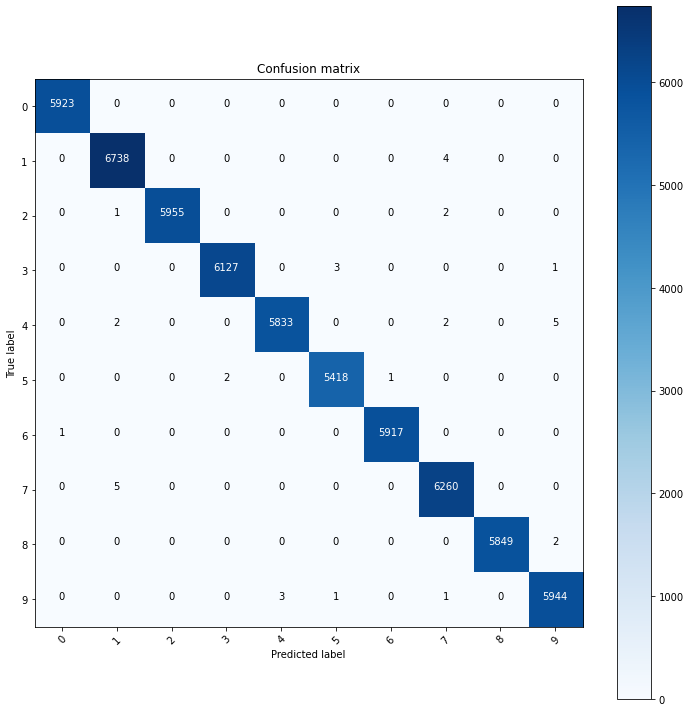

In [ ]:
cm=conf(model,train_loader,10)
cm=cm.cpu().numpy().astype('uint64')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, lst1)

# Part 3

Training and Evaluation Metrics for part3 without pretrained weights

In [ ]:
run(model,criterion,optimizer,scheduler,'/content/drive/MyDrive/Model_files','task2/BMCNN_part3_nopre',0,100,10,False,1)

 Epoch: 0 Iter: 0 Average train loss: 3.1254
 Epoch: 0 Iter: 1000 Average train loss: 2.4200
 Epoch: 0 Iter: 2000 Average train loss: 2.4051
 Epoch: 0 Iter: 3000 Average train loss: 2.3953
 Epoch: 0 Iter: 0 Average val loss: 2.3099 Acc1: 0.00 Acc3: 0.00 Acc5: 0.19


====> After epoch 0 
====>Epoch Time: 1m 3s
====>Average train loss: 2.3896 
====> Average val loss: 2.3095 Acc1: 0.12 Acc3: 0.24 Acc5: 0.44


 Epoch: 1 Iter: 0 Average train loss: 2.3351
 Epoch: 1 Iter: 1000 Average train loss: 2.3667
 Epoch: 1 Iter: 2000 Average train loss: 2.3626
 Epoch: 1 Iter: 3000 Average train loss: 2.3607
 Epoch: 1 Iter: 0 Average val loss: 2.3241 Acc1: 0.00 Acc3: 0.12 Acc5: 0.25


====> After epoch 1 
====>Epoch Time: 1m 2s
====>Average train loss: 2.3574 
====> Average val loss: 2.3221 Acc1: 0.02 Acc3: 0.16 Acc5: 0.35


 Epoch: 2 Iter: 0 Average train loss: 2.3581
 Epoch: 2 Iter: 1000 Average train loss: 2.3496
 Epoch: 2 Iter: 2000 Average train loss: 2.3464
 Epoch: 2 Iter: 3000 Average train loss

In [ ]:
print('====> After epoch {} '.format(con.epoch))
print('====>conv Time: {}'.format(con.time))
#print('====>conv Time: {}'.format(con.time))
print('====>Average train loss: {:.4f} +-{:.4f}'.format(
                 con.meter.value()[0],con.meter.value()[1]))

====> After epoch 4 
====>conv Time: 315.5340414047241
====>Average train loss: 2.3102 +-0.0010


In [ ]:
acc_meter=AverageValueMeter()
model.eval()
for batch_idx, (data,label) in enumerate(test_loader):
    data = data.to(device)
    label=label.to(device)
    data = data.expand(-1, 3, -1, -1)
    output= model(data)
    
   
    r=accuracy_fn(output.data,label.data,(1,3,5))
    acc_meter.add(r[0].item())
print('Test_accuracy:{}'.format(acc_meter.value()))

Test_accuracy:0.0116


Confusion matrix, without normalization
[[3362   12   19   76  130   78  446  136 1539  182]
 [3431   38   35  188  127   74  433  187 1040  254]
 [3193   24   43  209   98   53  467  170 1541  211]
 [3058   29   36  220  127   87  377  205 1645  253]
 [3178   17   36  190  123   86  480  152 1399  253]
 [3117   35   27  207  128   78  420  202 1685  240]
 [3018   30   35  177  132   91  518  166 1654  216]
 [3218   33   40  196  108   54  467  198 1345  295]
 [3081   16   26  194  120  110  403  143 1780  256]
 [3041   24   32  209   82   78  385  212 1652  279]]


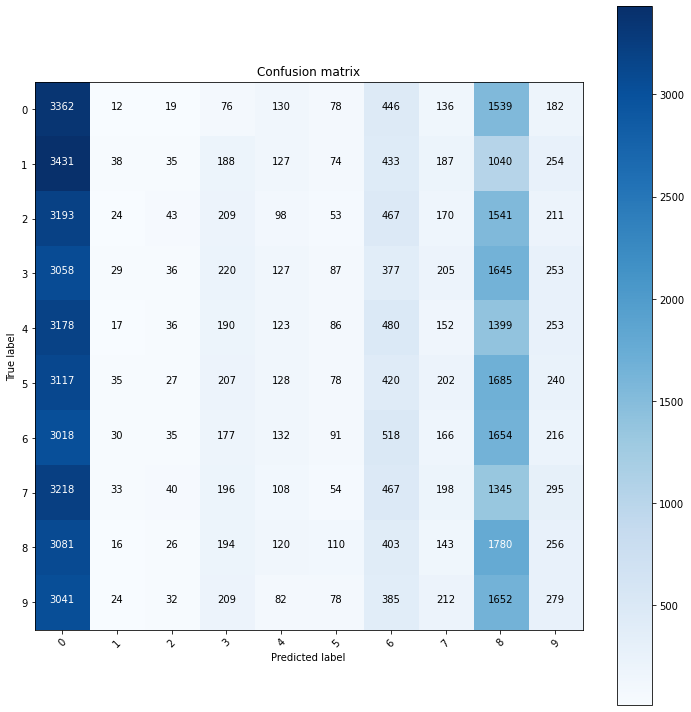

In [ ]:
cm=conf(model,train_loader,10)
cm=cm.cpu().numpy().astype('uint64')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, lst1)

Training and Evaluation Metrics for part3 with pretrained weights from part1

In [ ]:
run_pre(model,criterion,optimizer,scheduler,'/content/drive/MyDrive/Model_files','task2/BMCNN_part3_pre2',0,100,10,False,1)

 Epoch: 0 Iter: 0 Average train loss: 2.7048
 Epoch: 0 Iter: 1000 Average train loss: 2.4365
 Epoch: 0 Iter: 2000 Average train loss: 2.4062
 Epoch: 0 Iter: 3000 Average train loss: 2.3940
 Epoch: 0 Iter: 0 Average val loss: 2.3724 Acc1: 0.00 Acc3: 0.12 Acc5: 0.38


====> After epoch 0 
====>Epoch Time: 1m 3s
====>Average train loss: 2.3884 
====> Average val loss: 2.3522 Acc1: 0.01 Acc3: 0.13 Acc5: 0.28


 Epoch: 1 Iter: 0 Average train loss: 2.3908
 Epoch: 1 Iter: 1000 Average train loss: 2.3586
 Epoch: 1 Iter: 2000 Average train loss: 2.3600
 Epoch: 1 Iter: 3000 Average train loss: 2.3576
 Epoch: 1 Iter: 0 Average val loss: 2.3236 Acc1: 0.00 Acc3: 0.00 Acc5: 0.25


====> After epoch 1 
====>Epoch Time: 1m 3s
====>Average train loss: 2.3561 
====> Average val loss: 2.3253 Acc1: 0.01 Acc3: 0.12 Acc5: 0.31


 Epoch: 2 Iter: 0 Average train loss: 2.2772
 Epoch: 2 Iter: 1000 Average train loss: 2.3468
 Epoch: 2 Iter: 2000 Average train loss: 2.3460
 Epoch: 2 Iter: 3000 Average train loss

In [ ]:
print('====> After epoch {} '.format(con.epoch))
print('====>conv Time: {}'.format(con.time))
#print('====>conv Time: {}'.format(con.time))
print('====>Average train loss: {:.4f} +-{:.4f}'.format(
                 con.meter.value()[0],con.meter.value()[1]))

====> After epoch 3 
====>conv Time: 253.81242299079895
====>Average train loss: 2.3114 +-0.0027


In [ ]:
acc_meter=AverageValueMeter()
model.eval()
for batch_idx, (data,label) in enumerate(test_loader):
    data = data.to(device)
    label=label.to(device)
    data = data.expand(-1, 3, -1, -1)
    output= model(data)
    
   
    r=accuracy_fn(output.data,label.data,(1,3,5))
    acc_meter.add(r[0].item())
print('Test_accuracy:{}'.format(acc_meter.value()))

Test_accuracy:0.004200000000000006


Confusion matrix, without normalization
[[2875   94 1825   16  320   22  195   13  171  449]
 [2918   88 1458   21  377   38   59   41  199  608]
 [2649   78 2031   20  382   32  175   50  142  450]
 [2694   63 1870   26  431   34  183   48  188  500]
 [2715   84 1684   13  452   29  197   39  149  552]
 [2692   88 1995   19  428   33  199   47  136  502]
 [2680   80 1984   21  335   32  188   35  162  520]
 [2536   79 1897   18  426   22  166   48  137  625]
 [2684   94 1961   20  369   30  153   44  223  551]
 [2786   92 1650   21  423   34  177   49  174  588]]


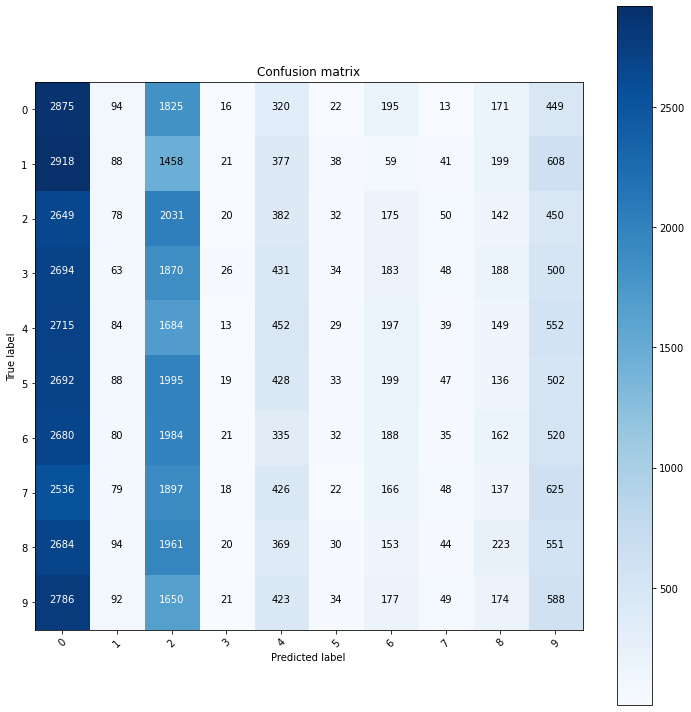

In [ ]:
cm=conf(model,train_loader,10)
cm=cm.cpu().numpy().astype('uint64')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, lst1)